<a href="https://colab.research.google.com/github/vijaythapakdata/Flight/blob/main/FlightPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dependecies

In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


Data Preprocessing

In [74]:
flight_data=pd.read_excel("/content/Data_Train.xlsx")

In [75]:
#print first 5 rows
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [76]:
#print last 5 rows of dataset
flight_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [77]:
flight_data.shape

(10683, 11)

In [78]:
flight_data.index

RangeIndex(start=0, stop=10683, step=1)

In [79]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [80]:
flight_data["Total_Stops"]=flight_data.fillna(flight_data["Total_Stops"].mode()[0])
flight_data["Route"]=flight_data.fillna(flight_data["Route"].mode()[0])

In [81]:
flight_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [82]:
flight_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


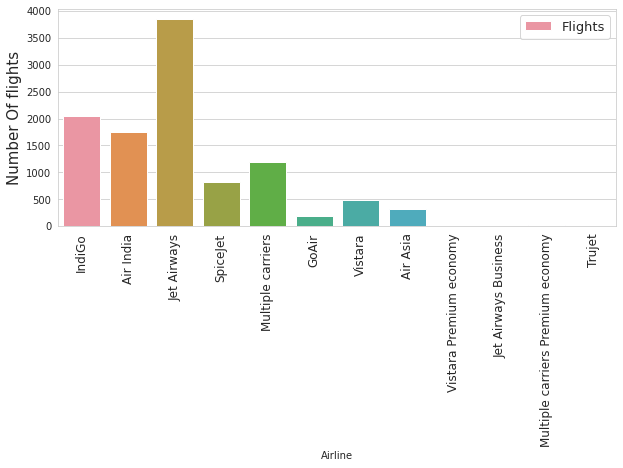

In [83]:
plt.figure(figsize=(10,4))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.countplot("Airline",data=flight_data,label="Flights")
plt.ylabel("Number Of flights",fontsize=15)
plt.legend(fontsize=13)
plt.xticks(rotation=90,fontsize=12)
plt.show()

In [84]:
flight_data["Source"].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


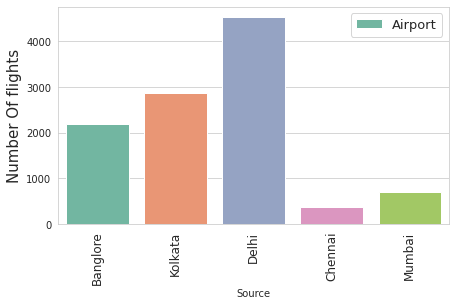

In [85]:
plt.figure(figsize=(7,4))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.countplot("Source",data=flight_data,label="Airport")
plt.ylabel("Number Of flights",fontsize=15)
plt.legend(fontsize=13)
plt.xticks(rotation=90,fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


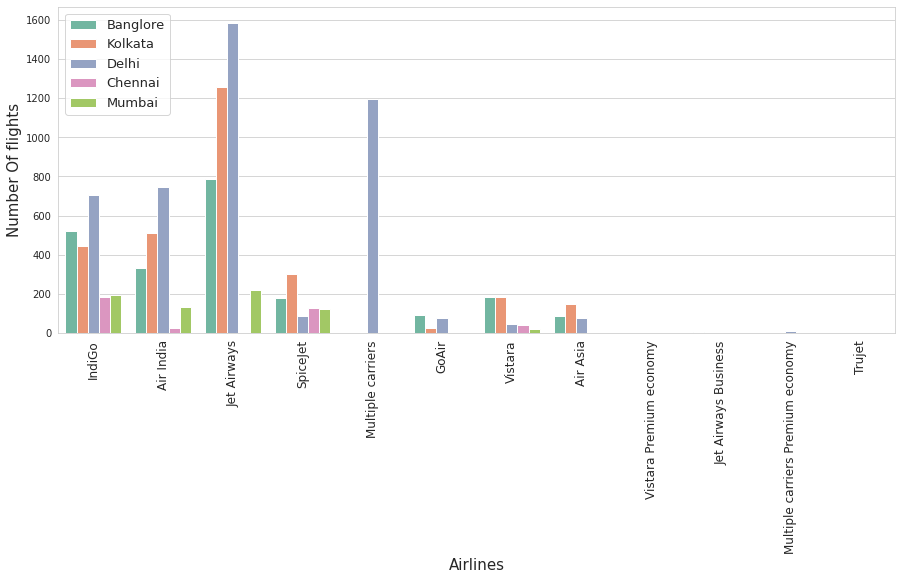

In [86]:
#Airlines w.r.t source
plt.figure(figsize=(15,6))
sns.set_style("whitegrid")
sns.set_palette("Set2")
sns.countplot("Airline",data=flight_data,hue="Source")
plt.ylabel("Number Of flights",fontsize=15)
plt.xlabel("Airlines",fontsize=15)
plt.legend(fontsize=13)
plt.xticks(rotation=90,fontsize=12)
plt.show()

In [87]:
flight_data["Destination"].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

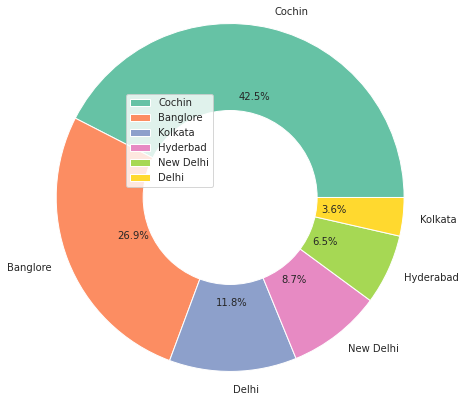

In [88]:
plt.pie(list(flight_data["Destination"].value_counts()),labels=list(flight_data["Destination"].value_counts().keys()),autopct="%.1f%%",radius=2)
plt.pie([1],colors=["w"],radius=1)
plt.legend(labels=["Cochin","Banglore","Kolkata","Hyderbad","New Delhi","Delhi"],loc="upper left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


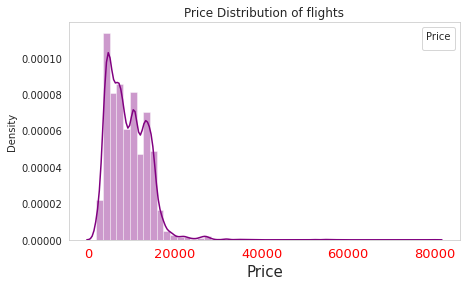

In [89]:
#price distribution
plt.figure(figsize=(7,4))
sns.distplot(flight_data["Price"],color="purple")
plt.title("Price Distribution of flights")
plt.legend(title="Price")
plt.xticks(fontsize=13,color="red")
plt.xlabel("Price",fontsize=15)
plt.grid(False)
plt.show()

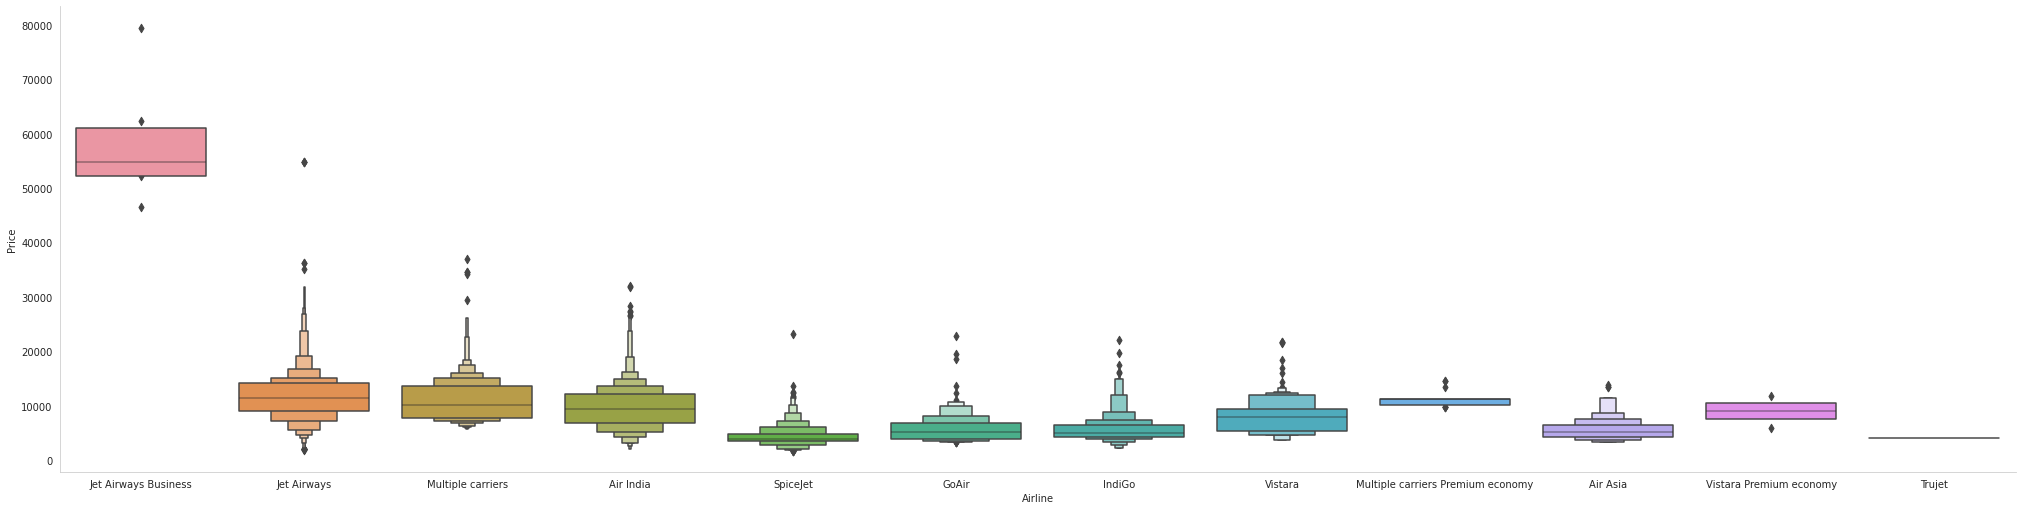

In [90]:
#airline vs price 
sns.catplot(y="Price", x="Airline",data=flight_data.sort_values("Price",ascending=False),height=7,kind="boxen",aspect=4)
plt.grid(False)
plt.show()

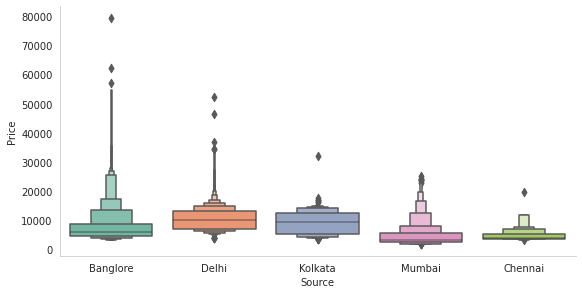

In [91]:
#price vs Source
sns.catplot(y="Price",x="Source",data=flight_data.sort_values("Price",ascending=False),height=4,kind="boxen",aspect=2)
plt.grid(False)
plt.show()

In [92]:
#Extracting day and Month of Jorney
flight_data["Journey_day"]=pd.to_datetime(flight_data["Date_of_Journey"],format="%d/%m/%Y").dt.day

#same apply with month to extracting month

flight_data["Journey_month"]=pd.to_datetime(flight_data["Date_of_Journey"],format="%d/%m/%Y").dt.month

#now drop Date_of_Journey

flight_data.drop(["Date_of_Journey"],axis=1,inplace=True)

In [96]:
#Extract hour and minute from Dep_Time

#extract hour

flight_data["Dep_hour"]=pd.to_datetime(flight_data["Dep_Time"]).dt.hour

#Extract Minute

flight_data["Dep_minute"]=pd.to_datetime(flight_data["Dep_Time"]).dt.minute

#Drop Dep_Time 
flight_data.drop(["Dep_Time"],axis=1,inplace=True)

In [100]:
#flight_data.head()

#arrival time is time when plane land to airport gate

flight_data["Arrival_hour"]=pd.to_datetime(flight_data["Arrival_Time"]).dt.hour

flight_data["Arrival_minute"]=pd.to_datetime(flight_data["Arrival_Time"]).dt.minute

flight_data.drop(["Arrival_Time"],axis=1,inplace=True)

In [114]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(flight_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [115]:
flight_data["Duration_hours"]=duration_hours
flight_data["Duration_mins"]=duration_mins

In [116]:
flight_data.drop(["Duration"],axis=1,inplace=True)

Handle Categorical Data

Categorical Data
1. Airline
2. Source
3. Destination
4. Destination
5. Total_Stops

All are nominal form so here we will use One hot encoding

In [118]:
Airline=flight_data[["Airline"]]
Airline=pd.get_dummies(Airline, drop_first=True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [119]:
Source=flight_data[["Source"]]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [120]:
Destination=flight_data[["Destination"]]
Destination=pd.get_dummies(Destination,drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [121]:
flight_data.drop(["Route", "Additional_Info"],axis=1,inplace=True)

In [123]:
flight_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [124]:
flight_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,IndiGo,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,Air India,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,Jet Airways,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,IndiGo,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,IndiGo,13302,1,3,16,50,21,35,4,45
